# Module 5  Data Cleaning And Preparation

In [1]:
import pandas as pd
import numpy as np

## Lecture 1

## Handling null values

### None: Non Pythonic Missing data

In [2]:
val1 =np.array([1,3,None,4])
val1

array([1, 3, None, 4], dtype=object)

In [3]:
#val1.sum() cannot be perform because of Null

### NaN: Missing numerical data

In [4]:
val2 =np.array([1,3,np.nan,4])
val2.dtype

dtype('float64')

In [5]:
val2

array([ 1.,  3., nan,  4.])

In [6]:
1+np.nan

nan

In [7]:
0*np.nan

nan

In [8]:
np.nansum(val2),np.nanmin(val2),np.nanmax(val2)

(8.0, 1.0, 4.0)

### NaN and None with Pandas

In [9]:
pd.Series([1,None,5,np.nan])

0    1.0
1    NaN
2    5.0
3    NaN
dtype: float64

In [10]:
data= pd.read_csv("D:/DATASETS/titanic/train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Operations

### 1- isnull()

In [11]:
data.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [12]:
data.Age.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [13]:
data.Age.isnull().sum()

177

### 2-notnull()

In [14]:
data.Age.notnull()

0       True
1       True
2       True
3       True
4       True
       ...  
886     True
887     True
888    False
889     True
890     True
Name: Age, Length: 891, dtype: bool

In [15]:
data.Age[data.Age.notnull()]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

In [16]:
df = pd.DataFrame({
     "A":[1,2,3,None],
     "B":['#Na',12,3,5],
     "C":[11,22,34,'no val'],
     "D":['No',2,np.nan,44],
     "E":['n/a',2,3,None],
})

In [17]:
df.to_csv('clean_me.csv')

In [18]:
df= pd.read_csv("clean_me.csv",index_col=[0])
df

,A,B,C,D,E
0,1.0,#Na,11,No,NaN
1,2.0,12,22,2,2.0
2,3.0,3,34,NaN,3.0
3,NaN,5,no val,44,NaN


In [19]:
df= pd.read_csv("clean_me.csv",index_col=[0],na_values=['#Na','no val','No'])
df

,A,B,C,D,E
0,1.0,NaN,11.0,NaN,NaN
1,2.0,12.0,22.0,2.0,2.0
2,3.0,3.0,34.0,NaN,3.0
3,NaN,5.0,NaN,44.0,NaN


In [20]:
df.isnull().sum()

A    1
B    1
C    1
D    2
E    2
dtype: int64

## Lecture 2

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

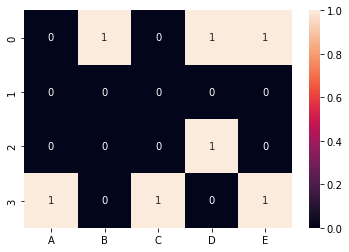

In [25]:
sns.heatmap(df.isnull(),annot=True)

In [27]:
import sys
!{sys.executable} -m pip install missingno


  Using cached missingno-0.5.1-py3-none-any.whl (8.7 kB)


In [28]:
import missingno as msna

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

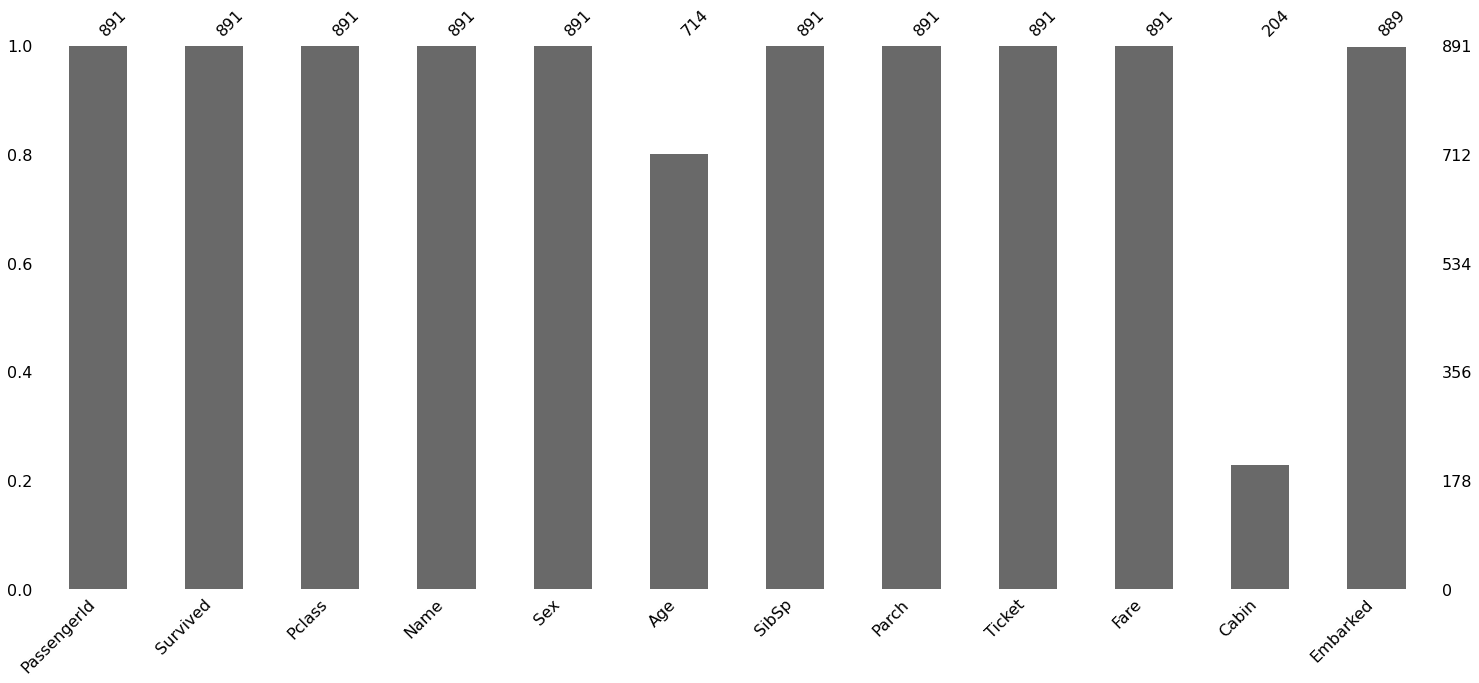

In [32]:
msna.bar(data)

In [33]:
#if column have less than 20 % non null values then it is best practice to drop that column 

<AxesSubplot:>

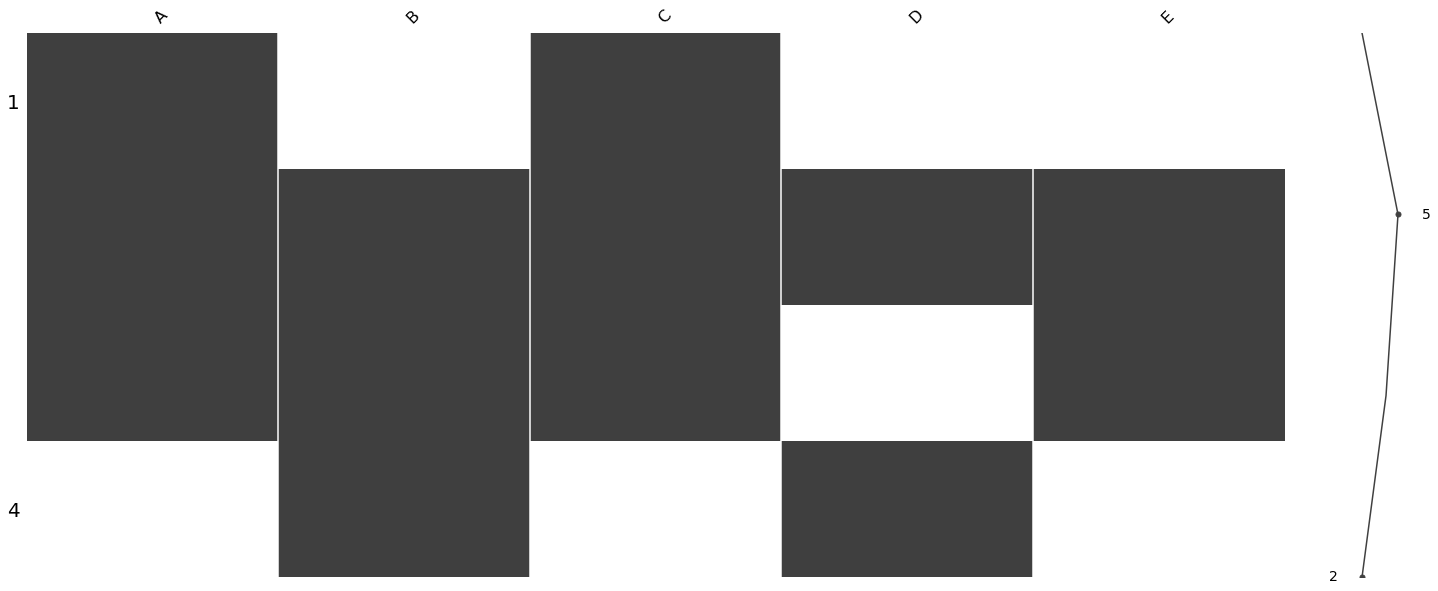

In [35]:
msna.matrix(df)

<AxesSubplot:>

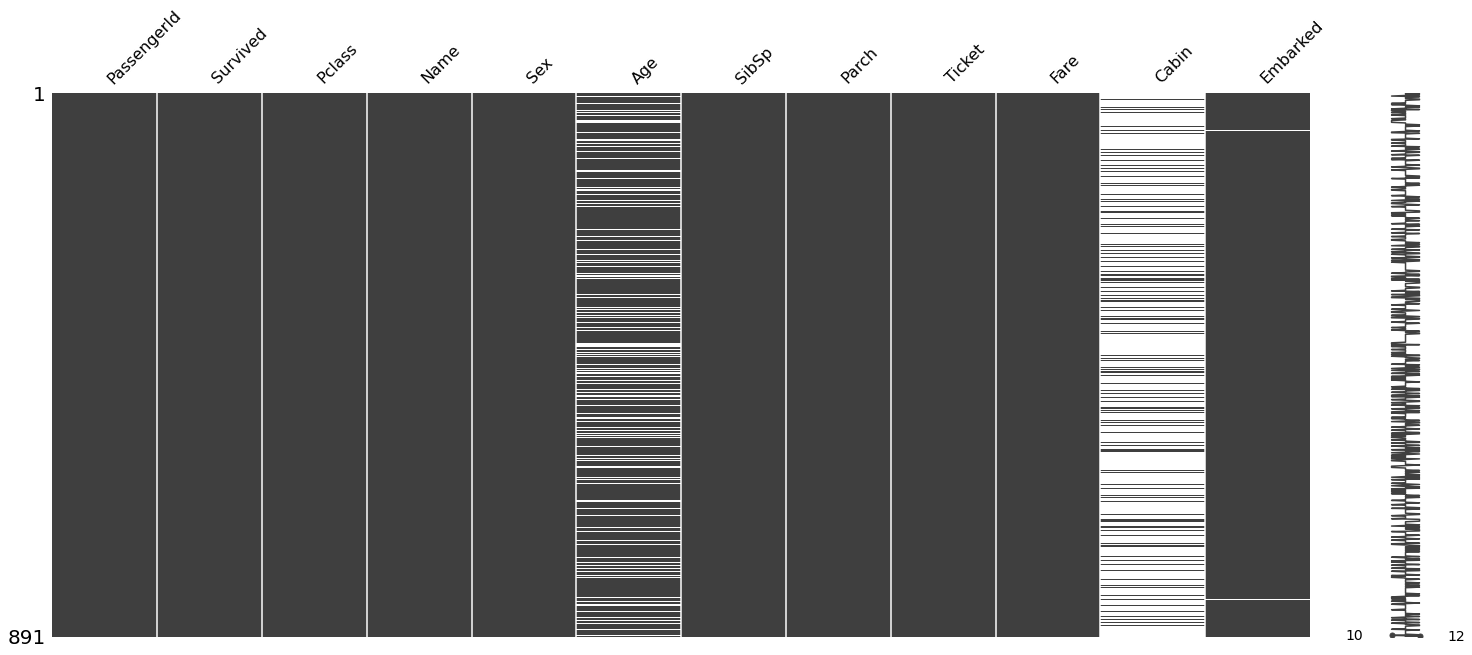

In [36]:
msna.matrix(data)

<AxesSubplot:>

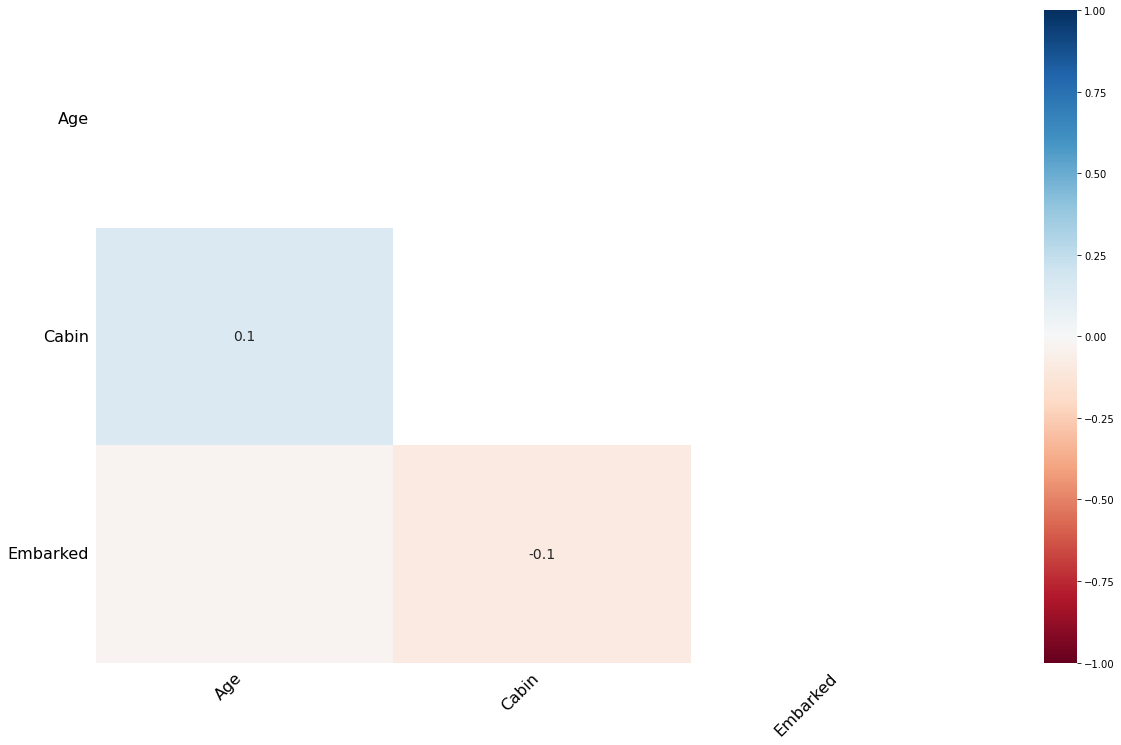

In [37]:
msna.heatmap(data)

<AxesSubplot:>

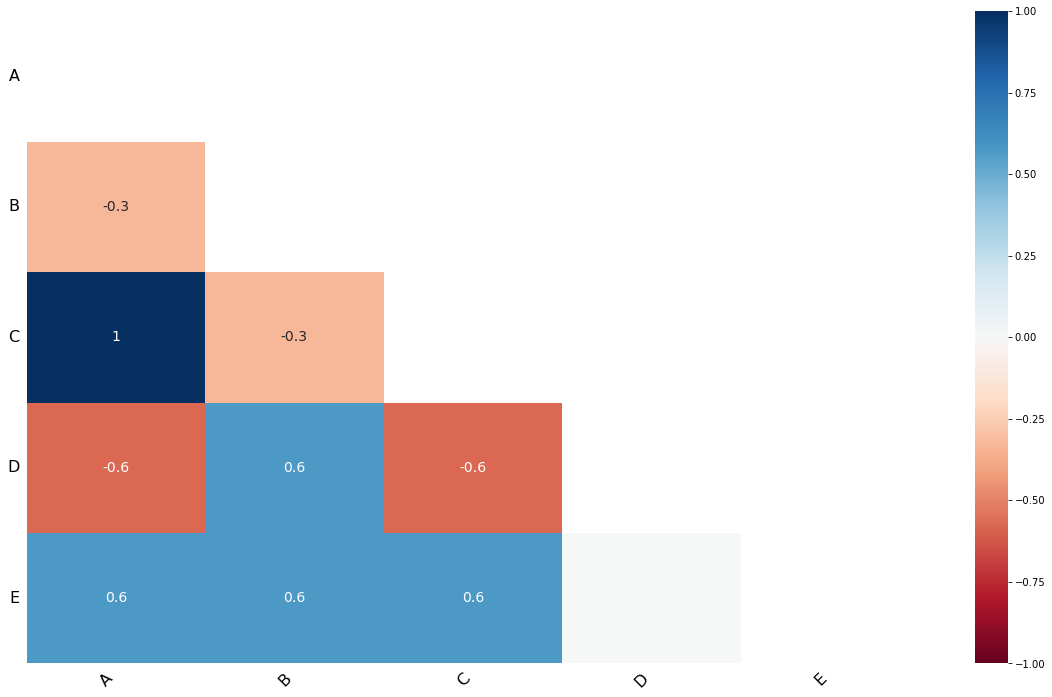

In [39]:
msna.heatmap(df)

In [40]:
df

,A,B,C,D,E
0,1.0,NaN,11.0,NaN,NaN
1,2.0,12.0,22.0,2.0,2.0
2,3.0,3.0,34.0,NaN,3.0
3,NaN,5.0,NaN,44.0,NaN


In [44]:
data_count_of_missvalues_by_col = (data.isnull().sum())
display(data_count_of_missvalues_by_col)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [45]:
display(data_count_of_missvalues_by_col[data_count_of_missvalues_by_col>1])

Age         177
Cabin       687
Embarked      2
dtype: int64

In [47]:
display(data_count_of_missvalues_by_col[data_count_of_missvalues_by_col>1]/data.shape[0]*100)

Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64

## Lecture 3

### Pairwise Deletion

In [48]:
df

,A,B,C,D,E
0,1.0,NaN,11.0,NaN,NaN
1,2.0,12.0,22.0,2.0,2.0
2,3.0,3.0,34.0,NaN,3.0
3,NaN,5.0,NaN,44.0,NaN


In [51]:
 #pandas take care of null values and we can perform different operations

In [50]:
df.sum()

A     6.0
B    20.0
C    67.0
D    46.0
E     5.0
dtype: float64

In [53]:
data2=data.copy()
data2['Age'].mean()

29.69911764705882

### Listwise/Row wise Deletion

In [55]:
df.dropna()

,A,B,C,D,E
1,2.0,12.0,22.0,2.0,2.0


In [56]:
df

,A,B,C,D,E
0,1.0,NaN,11.0,NaN,NaN
1,2.0,12.0,22.0,2.0,2.0
2,3.0,3.0,34.0,NaN,3.0
3,NaN,5.0,NaN,44.0,NaN


In [59]:
df.dropna(subset=['B']) #it will drop row where B's value is NaN

,A,B,C,D,E
1,2.0,12.0,22.0,2.0,2.0
2,3.0,3.0,34.0,NaN,3.0
3,NaN,5.0,NaN,44.0,NaN


In [60]:
df.dropna(axis='rows',thresh=3)

,A,B,C,D,E
1,2.0,12.0,22.0,2.0,2.0
2,3.0,3.0,34.0,NaN,3.0


### Dropping entire columns

In [62]:
df.dropna(axis='columns') # all the columns have atleast 1 null value

""
0
1
2
3


In [65]:
df.dropna(subset=['D','E'],how='all') #drop where D and E both are NaN

,A,B,C,D,E
1,2.0,12.0,22.0,2.0,2.0
2,3.0,3.0,34.0,NaN,3.0
3,NaN,5.0,NaN,44.0,NaN


In [68]:
df.dropna(subset=['B','C'],how='any') #drop where B or C both are NaN

,A,B,C,D,E
1,2.0,12.0,22.0,2.0,2.0
2,3.0,3.0,34.0,NaN,3.0


In [70]:
df.dropna(axis=1,how='all') #drop where row has all vaues  NaN

,A,B,C,D,E
0,1.0,NaN,11.0,NaN,NaN
1,2.0,12.0,22.0,2.0,2.0
2,3.0,3.0,34.0,NaN,3.0
3,NaN,5.0,NaN,44.0,NaN


In [80]:
df.dropna(axis='columns',thresh=3)#drop where clumn has less than 3 non null values

,A,B,C
0,1.0,NaN,11.0
1,2.0,12.0,22.0
2,3.0,3.0,34.0
3,NaN,5.0,NaN


In [81]:
df.dropna(axis='columns',thresh=int(0.8*df.shape[0]))

,A,B,C
0,1.0,NaN,11.0
1,2.0,12.0,22.0
2,3.0,3.0,34.0
3,NaN,5.0,NaN
